

---


# **ML prediction**
#### ***Look before you Leap : Leveraging Predictive Models to Improve Automotive Safety and Travel Time***



---



**Final Project**
CSCI 35300/79502   |   Fall 2020 

##### Hannah Do







---

### Comparison on before and after in addition of twitter dataset 
- importing different files for cross validation and evaluation

In [1]:
# Import all the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

import datetime, string, re
import sys, os

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import make_scorer


from collections import Counter

print('All Libraries Sucessfully Imported')

All Libraries Sucessfully Imported


In [42]:
temp = pd.read_csv("preprocessed_6a.csv", sep=',')

# preprocessed_6a.csv
# preprocessed_6b.csv
# preprocessed_7a.csv
# preprocessed_6b.csv
# ...
# preprocessed_11a.csv
# preprocessed_11b.csv

temp = temp.drop(columns = ['Unnamed: 0'], axis=1)
# drop NaN column with index values

temp

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,distance,severity
0,20200630,1100,40.607243,-73.987260,0,0,0,0,0,0,0,0,Unspecified,NaN,4324995,Station Wagon/Sport Utility Vehicle,NaN,88,15
1,20200630,1540,40.782787,-73.957410,0,0,0,0,0,0,0,0,Unspecified,NaN,4324800,Station Wagon/Sport Utility Vehicle,NaN,440,23
2,20200628,1430,40.707860,-73.848460,1,0,0,0,0,0,1,0,Following Too Closely,Unspecified,4323925,Sedan,Sedan,433,16
3,20200627,1920,40.628730,-73.943340,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,4326375,Sedan,Sedan,683,3
4,20200625,1400,40.757725,-73.779274,0,0,0,0,0,0,0,0,Backing Unsafely,Unspecified,4323080,Sedan,Sedan,1804,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6839,20200618,1352,40.867680,-73.894660,1,0,1,0,0,0,0,0,Backing Unsafely,NaN,4321533,Sedan,NaN,529,17
6840,20200611,1720,40.862410,-73.922500,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,NaN,4319426,Station Wagon/Sport Utility Vehicle,NaN,344,19
6841,20200606,5,40.833010,-73.950270,0,0,0,0,0,0,0,0,Pavement Slippery,NaN,4318296,Sedan,NaN,152,11
6842,20200622,410,40.903480,-73.850350,1,0,0,0,0,0,1,0,Unspecified,NaN,4322453,Sedan,NaN,456,5


In [60]:

y = sample['target']
X = sample.drop(columns=['target'],axis=1)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42,stratify=y)


In [62]:
brf = BalancedRandomForestClassifier(n_estimators=200,max_depth=16,n_jobs=3,random_state=0)
brf.fit(X_train, y_train) 

pred = brf.predict(X_test)
print(roc_auc_score(y_test,pred))

0.9931385568835769


In [63]:
oversample = SMOTE()
X, y = oversample.fit_resample(sample, sample['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

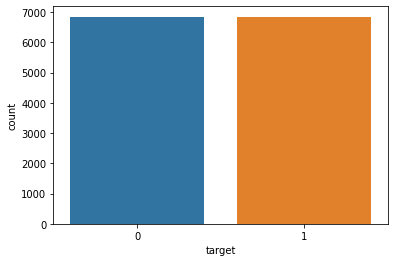

In [64]:

#Oversampling the data
smote = SMOTE(random_state = 101)
#Creating a new Oversampling Data Frame
df_oversampler = pd.DataFrame(X)
df_oversampler['target']
sns.countplot(df_oversampler['target'])

In [65]:
df_oversampler

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,COLLISION_ID,distance,severity,target
0,20200630,1100,40.607243,-73.987260,0,0,0,0,0,0,0,0,4324995,88,15,1
1,20200630,1540,40.782787,-73.957410,0,0,0,0,0,0,0,0,4324800,440,23,1
2,20200628,1430,40.707860,-73.848460,1,0,0,0,0,0,1,0,4323925,433,16,1
3,20200627,1920,40.628730,-73.943340,0,0,0,0,0,0,0,0,4326375,683,3,1
4,20200625,1400,40.757725,-73.779274,0,0,0,0,0,0,0,0,4323080,1804,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13683,20200619,727,40.348291,-73.769158,0,0,0,0,0,0,0,0,4326867,43,16,0
13684,20200625,1491,40.348291,-73.836794,0,0,0,0,0,0,0,0,4329652,57,8,0
13685,20200621,1290,40.348291,-73.657526,0,0,0,0,0,0,0,0,4326970,20,7,0
13686,20200626,2115,40.348291,-73.695857,0,0,0,0,0,0,0,0,4329247,622,0,0


---
### Running ML models on files collected

In [ ]:
files = ['features_6a', 'features_6b', 'features_7a', 'features_7b', 'features_8a', 'features_8b', 'features_9a', 'features_9b', 'features_10a', 'features_10b', 'features_11a', 'features_11b']



---
**Different ML models**

In [56]:
# Create a function with many machine learning models 
from sklearn.model_selection import cross_val_score
def models_cross(X,y):

    list1 = []
    
    
    #Use KNeighbors & Cross Validation with different parameters - not adequate for our dataset
#     param_grid = {'n_neighbors': [3, 5, 10], 'p': [1, 5, 10, 100], 'weights': ["uniform", "distance"]}
#     knn = KNeighborsClassifier()
#     knn = GridSearchCV(knn, param_grid, scoring='f1_micro', cv=5, verbose=1, n_jobs=-1)
#     knn.fit(X_train, y_train)
#     params_optimal = knn.best_params_
    
#     knn_optimal = KNeighborsClassifier(**params_optimal)
#     knn_optimal = KNeighborsClassifier()

#     knn_optimal.fit(X_train, y_train)
#     y_pred=knn_optimal.predict(X_test)

#     knn_acc=accuracy_score(y_test, y_pred)
#     list1.append(knn_acc)
    

 #   #Use SVC (RBF kernal)
 #   print("Starting SVC")
#   svc_rbf = SVC(kernel='rbf', random_state = 4)
 #   svc_scores = cross_val_score(svc_rbf, X, y, cv=8,n_jobs=-1)
  #  print('SVC Cross-Validation Accuracy Scores', svc_scores)
 #   svc_scores_series = pd.Series(svc_scores)
 #   list1.append(svc_scores_series.mean())


    
    #Use GaussianNB
    print("Starting GaussianNB")
    gauss = GaussianNB()
    gauss_scores = cross_val_score(gauss, X, y, cv=8,n_jobs=-1)
    print('GaussianNB Cross-Validation Accuracy Scores', gauss_scores)
    gauss_scores_series = pd.Series(gauss_scores)
    list1.append(gauss_scores_series.mean())


    
    #Use Decision Tree
    print("Starting Decision Tree")
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
    tree_scores = cross_val_score(tree, X, y, cv=8,n_jobs=-1)
    print('Decision Tree Cross-Validation Accuracy Scores', tree_scores)
    tree_scores_series = pd.Series(tree_scores)
    list1.append(tree_scores_series.mean())


    #Use the RandomForestClassifier 
    print("Starting Randrom forest")
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42, n_jobs = -1)
    forest_scores = cross_val_score(forest, X, y, cv=8,n_jobs=-1)
    print('Random forest Cross-Validation Accuracy Scores', forest_scores)
    forest_scores_series = pd.Series(forest_scores)
    list1.append(forest_scores_series.mean())
    
#     print(classification_report(y_test, forest.predict(X_test)))

    #Use Logistic regression & Cross Validation with different parameters - commented out because algorithm did not converge
#     param_grid = {'penalty': ['l1', 'l2', 'elasticnet','none'], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], 'dual':[bool, False], 'C':[0.001, 0.1, 1, 10, 100], 'max_iter':[1, 500, 10000]}
#     lr = LogisticRegression(multi_class='ovr')
#     lr = GridSearchCV(lr, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1)
#     lr.fit(X_train, y_train)
#     params_optimal = lr.best_params_
#     log = LogisticRegression(multi_class='ovr', **params_optimal)
    

    print("Starting Logistic regression")
    log = LogisticRegression(multi_class='ovr', n_jobs = -1, random_state = 42)
    log_scores = cross_val_score(log, X, y, cv=8,n_jobs=-1)
    print('Logistic regression Cross-Validation Accuracy Scores', log_scores)
    log_scores_series = pd.Series(log_scores)
    list1.append(log_scores_series.mean())
    
    
    
    
    print("Starting XGBoost")
    xg = xgb.XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)
    xg_scores = cross_val_score(xg, X, y, cv=8,n_jobs=-1)
    print('XGBoost Cross-Validation Accuracy Scores', xg_scores)
    xg_scores_series = pd.Series(xg_scores)
    list1.append(xg_scores_series.mean())
    


 
    return list1

In [66]:
import datetime
startTime = datetime.datetime.now()
# ml_result = pd.DataFrame()

# for f in files:

list0 = pd.DataFrame()

# temp = pd.read_csv("features_6a.csv", index_col= None, header = None)

temp = df_oversampler
# temp = temp.drop([0], axis=1)
# # drop NaN column with index values

# temp.columns = temp.iloc[0]
# temp = temp[1:] 
# # make first row as column names

y = temp['target']
# temp = temp.drop(f + ' stock', axis=1)
X = temp.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#list0 = models(X_train, X_test, y_train, y_test)
list0 = models_cross(X,y)

# final_table[f] = list0
    
# final_table
print("time elapsed: ", datetime.datetime.now() - startTime)

list0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1348
           1       1.00      1.00      1.00      1390

    accuracy                           1.00      2738
   macro avg       1.00      1.00      1.00      2738
weighted avg       1.00      1.00      1.00      2738



[0.733382030679328,
 0.49233016800584367,
 0.7311906501095691,
 0.9985390796201608,
 0.9996347699050402]

In [69]:
ml_models = ['SVC-rbf', 'Gaussian NB', 'Decision Tree', 'Random Forest','Logistic Regression', 'XGBoost']



No handles with labels found to put in legend.


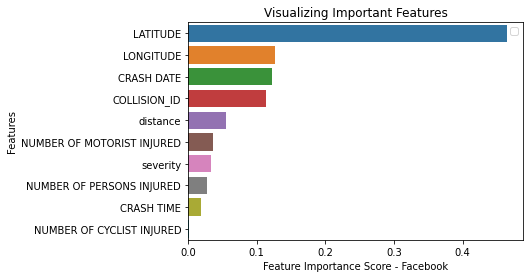

In [67]:
forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
forest.fit(X_train, y_train)
# y_pred=forest.predict(X_test)

feature_imp = pd.Series(forest.feature_importances_,index=X_train.columns).sort_values(ascending=False)

# selected_feat= X.columns[(sel.get_support())]


# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()